<a href="https://colab.research.google.com/github/Happday-bot/Quantum-Computing-Projects/blob/main/Ansantz_problem_specific.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 109.8 MB/s eta 0:00:00


**Ansatz** in quantum computing is a parameterized quantum circuit used as a smart starting point to approximate solutions to complex problems.

# ✅ Why It’s Needed (in one line):
It limits the search to a manageable subspace of the quantum state space, enabling efficient optimization on NISQ devices.

# 🧠 Without an ansatz:
The quantum state space is exponentially large — impossible to explore fully.

Optimization would be intractable and unphysical.

# 🚀 With an ansatz:
You define a tunable circuit.

A classical optimizer adjusts the parameters.

The quantum computer evaluates performance (e.g. energy or accuracy).

Together, they converge to an optimal solution.

It’s the core strategy behind variational algorithms, enabling practical quantum advantage on today’s limited hardware.












# ***Basically the ground in which we play is the ansantz for solving any problem using quantum computing***

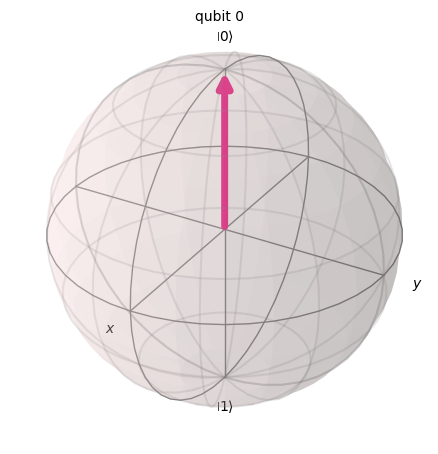

In [ ]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector([1,0])


# This is the Hilbert Space

# **🎯 Objective:**
*Find the right input (parameter) to a quantum circuit so that the output state matches a known target state — specifically, the |+⟩ state (a balanced superposition of |0⟩ and |1⟩).*

# ***Steps:***

1. **Define a known target quantum state.**
Example: |+⟩ = (|0⟩ + |1⟩)/√2

2. **Choose an ansatz (parameterized circuit form).**
Example: A circuit with a single RY(θ) rotation.
✅ This defines a search space of quantum states.

3. **Initialize θ with a random or fixed value.**

4. **Apply the ansatz with current θ to get a quantum state.**

5. **Measure similarity to target using a cost function.**
Example: 1 - fidelity between the ansatz output and target state.

6. **Use a classical optimizer to minimize the cost. It updates θ and repeats steps 4–5.**

7. **Stop when the cost is close to 0.**
8. **This means the ansatz with the found θ produces the desired state.**



Optimal θ: [1.57084319e+00 8.65364178e-06]
Final Fidelity with Bell state: 1.000000


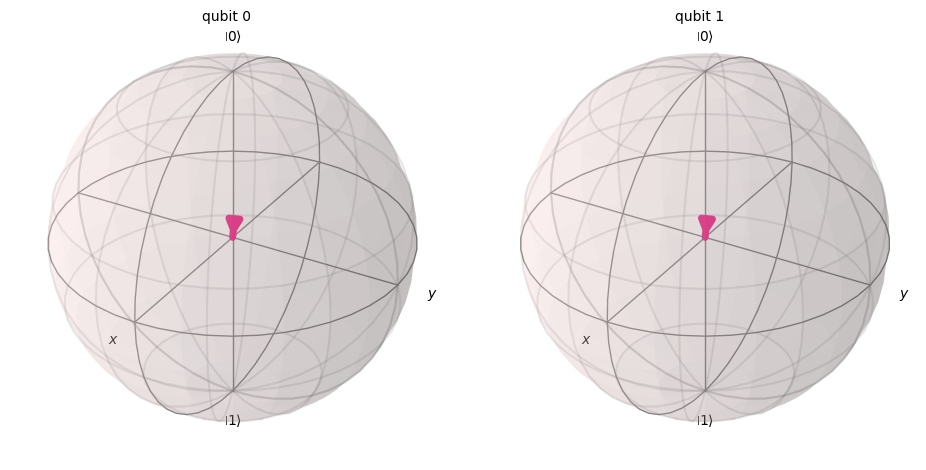

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.circuit import ParameterVector
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from scipy.optimize import minimize
import numpy as np

# ---------------------
# 1. Initializer
# ---------------------
num_qubits = 2
params = ParameterVector('θ', 2)

# ---------------------
# 2. Reference state ρ = |Φ+⟩ = (|00⟩ + |11⟩) / sqrt(2)
# ---------------------

Iqc = QuantumCircuit(2)
Iqc.h(0)
Iqc.cx(0,1)
target_state = Statevector.from_label('00').evolve(Iqc)

# ---------------------
# 3. Ansatz: Parametrized RY + entanglement
# ---------------------
def create_ansatz(theta_values):
    qc = QuantumCircuit(2)
    qc.ry(theta_values[0], 0)
    qc.ry(theta_values[1], 1)
    qc.cx(0, 1)
    return qc

# ---------------------
# 5. Cost Function: 1 - Fidelity with |Φ+⟩
# ---------------------
def cost_function(theta_values):
    qc = create_ansatz(theta_values)
    state = Statevector.from_instruction(qc)
    fidelity = np.abs(state.inner(target_state)) ** 2
    return 1 - fidelity

# ---------------------
# 6. Parameter Update: Classical optimization loop
# ---------------------
initial_guess = [0.1, 0.1]
opt_result = minimize(cost_function, initial_guess, method='COBYLA')

optimal_theta = opt_result.x
fidelity = 1 - cost_function(optimal_theta)

# ---------------------
# Resulting Circuit & Final State
# ---------------------
final_circuit = create_ansatz(optimal_theta)
final_state = Statevector.from_instruction(final_circuit)

print(f"Optimal θ: {optimal_theta}")
print(f"Final Fidelity with Bell state: {fidelity:.6f}")

# Visualize the Bloch spheres of each qubit
plot_bloch_multivector(final_state)


# **In this implementation check what happens when you can write your own optimiser like the follwing which is the code for Brute Descent**


```
import numpy as np

def custom_optimizer(cost_fn, initial_params, steps=100, learning_rate=0.1):
    theta = np.array(initial_params)
    best_cost = cost_fn(theta)

    for step in range(steps):
        # Try a small random tweak
        trial_theta = theta + np.random.uniform(-learning_rate, learning_rate, size=len(theta))
        trial_cost = cost_fn(trial_theta)

        # Accept new parameters only if they improve cost
        if trial_cost < best_cost:
            theta = trial_theta
            best_cost = trial_cost

        print(f"Step {step+1}: cost = {best_cost:.6f}, θ = {theta}")

    return theta, best_cost

```

Replace:
```
opt_result = minimize(cost_function, initial_guess, method='COBYLA')
optimal_theta = opt_result.x
```


With:

```
optimal_theta, final_cost = custom_optimizer(cost_function, [0.1, 0.1], steps=200, learning_rate=0.05)
```

# **🔧 You Can Also Build:**
Gradient descent (if you can compute gradient of cost)

Momentum or Adam-based optimizers

Grid search for small parameter spaces

Evolutionary algorithms / Genetic Algorithms

# **📌 Key Considerations:**
Custom optimizers give you transparency + control.

But built-ins like COBYLA, SPSA, L-BFGS-B are highly optimized and often more efficient for high-dimensional or noisy problems.

For noisy circuits or real hardware, SPSA is preferred due to robustness.



# ***What IF ?***

If we can visualise the changes in the parameters then will it not be good to understand ?



Optimal θ: [1.57084319e+00 8.65364178e-06]
Final Fidelity with Bell state: 1.000000


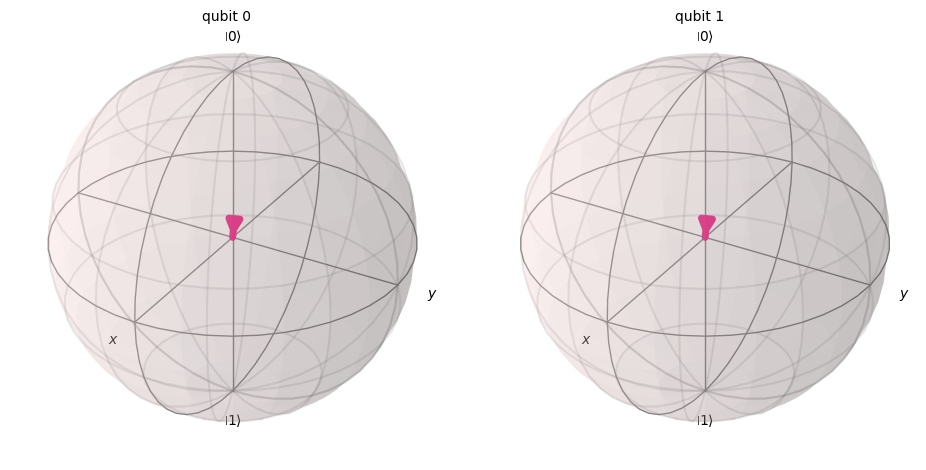

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.circuit import ParameterVector
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from scipy.optimize import minimize
import numpy as np

# ---------------------
# 1. Initializer
# ---------------------
num_qubits = 2
params = ParameterVector('θ', 2)

# ---------------------
# 2. Reference state ρ = |Φ+⟩ = (|00⟩ + |11⟩) / sqrt(2)
# ---------------------

Iqc = QuantumCircuit(2)
Iqc.h(0)
Iqc.cx(0,1)
target_state = Statevector.from_label('00').evolve(Iqc)

# ---------------------
# 3. Ansatz: Parametrized RY + entanglement
# ---------------------
def create_ansatz(theta_values):
    qc = QuantumCircuit(2)
    qc.ry(theta_values[0], 0)
    qc.ry(theta_values[1], 1)
    qc.cx(0, 1)
    return qc

# ---------------------
# 5. Cost Function: 1 - Fidelity with |Φ+⟩
# ---------------------
fidelity_history = []
thetaValues_history = []

def cost_function(theta_values):
    qc = create_ansatz(theta_values)
    thetaValues_history.append(theta_values)
    state = Statevector.from_instruction(qc)
    fidelity = np.abs(state.inner(target_state)) ** 2
    fidelity_history.append(fidelity)
    return 1 - fidelity
# ---------------------
# 6. Parameter Update: Classical optimization loop
# ---------------------
initial_guess = [0.1, 0.1]
opt_result = minimize(cost_function, initial_guess, method='COBYLA')

optimal_theta = opt_result.x
fidelity = 1 - cost_function(optimal_theta)

# ---------------------
# Resulting Circuit & Final State
# ---------------------
final_circuit = create_ansatz(optimal_theta)
final_state = Statevector.from_instruction(final_circuit)

print(f"Optimal θ: {optimal_theta}")
print(f"Final Fidelity with Bell state: {fidelity:.6f}")

# Visualize the Bloch spheres of each qubit
plot_bloch_multivector(final_state)


Visualise

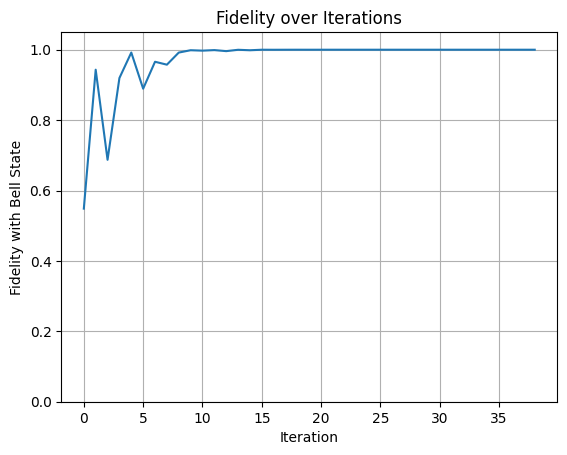

Iteration 1: θ = [0.1 0.1]
Iteration 2: θ = [1.1 0.1]
Iteration 3: θ = [1.1 1.1]
Iteration 4: θ = [ 1.93900203 -0.44412829]
Iteration 5: θ = [ 1.51950101 -0.17206415]
Iteration 6: θ = [ 1.42388891 -0.66283734]
Iteration 7: θ = [1.92126059 0.12557531]
Iteration 8: θ = [ 1.57819989 -0.41507534]
Iteration 9: θ = [ 1.41903997 -0.09768284]
Iteration 10: θ = [ 1.59418138 -0.07182522]
Iteration 11: θ = [1.66977706 0.02772523]
Iteration 12: θ = [ 1.63197922 -0.02204999]
Iteration 13: θ = [ 1.68599377 -0.05349325]
Iteration 14: θ = [1.58712154 0.02147055]
Iteration 15: θ = [1.55681335 0.07613008]
Iteration 16: θ = [1.56288483 0.0017438 ]
Iteration 17: θ = [1.54927294 0.00941564]
Iteration 18: θ = [ 1.56620017 -0.01352542]
Iteration 19: θ = [1.57010833 0.00471973]
Iteration 20: θ = [1.57173319 0.0123614 ]
Iteration 21: θ = [ 1.57461596 -0.00166121]
Iteration 22: θ = [1.57806371e+00 1.75030047e-04]
Iteration 23: θ = [ 1.57160237 -0.00414659]
Iteration 24: θ = [ 1.57610622 -0.00292368]
Iteration 2

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fidelity_history)
plt.title("Fidelity over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Fidelity with Bell State")
plt.grid(True)
plt.ylim(0, 1.05)
plt.show()


for i in range(len(thetaValues_history)):
    print(f"Iteration {i+1}: θ = {thetaValues_history[i]}")